## LeNet 5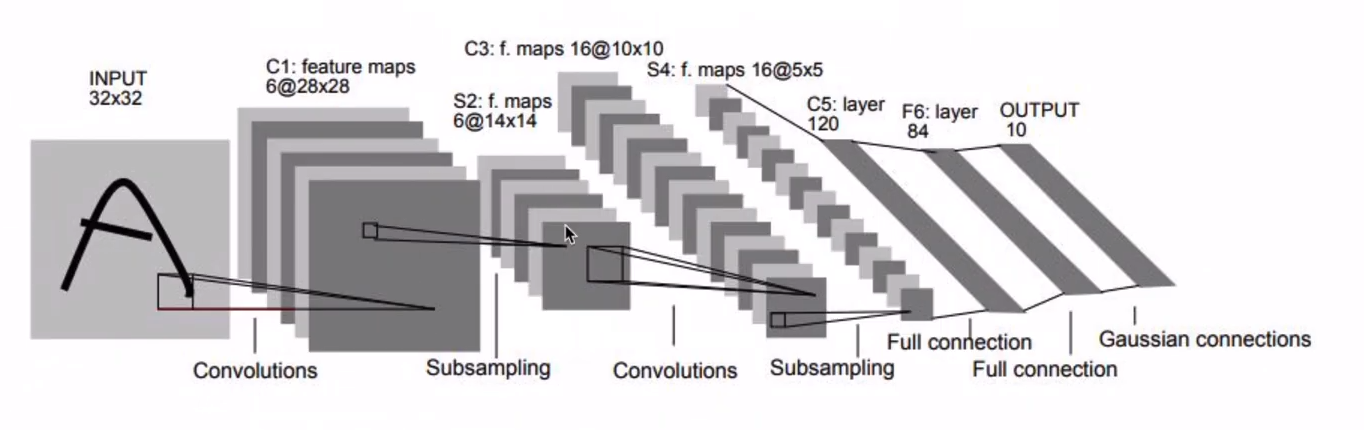

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
# 데이터 준비
(independent, dependent), _ = tf.keras.datasets.mnist.load_data()
independent = independent.reshape(60000, 28, 28, 1)
dependent = pd.get_dummies(dependent)
print(independent.shape, dependent.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


In [4]:
# 모델을 완성한다.
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [5]:
model.fit(independent, dependent, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 1.1576 - accuracy: 0.8657
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0795 - accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0641 - accuracy: 0.9826
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0639 - accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0607 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0562 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0603 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0651 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0591 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 36s 19m

In [11]:
# 모델 이용
pred = model.predict(independent[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.01,0.07,0.16,0.03,0.35,0.28,0.07,0.00,0.02
1,0.03,0.03,0.08,0.08,0.09,0.14,0.03,0.46,0.01,0.05
2,0.09,0.02,0.10,0.13,0.05,0.16,0.01,0.23,0.08,0.14
3,0.01,0.00,0.15,0.09,0.21,0.15,0.32,0.06,0.00,0.01
4,0.01,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


In [12]:
# 정답 확인
independent[0:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
# 모델 확인
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               4812

## Cifar 10

In [7]:
# 데이터 준비
(independent, dependent), _ = tf.keras.datasets.cifar10.load_data()
print(independent.shape, dependent.shape)

dependent = pd.get_dummies(dependent.reshape(50000))      # cifar10은 1차원 형태가 아니기 때문에 1차원 형태로 바꿔주는 reshape를 사용
print(independent.shape, dependent.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


In [8]:
# 모델을 완성한다.
X = tf.keras.layers.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [9]:
model.fit(independent, dependent, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 3.1651 - accuracy: 0.2094
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.6645 - accuracy: 0.3975
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5741 - accuracy: 0.4362
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.5198 - accuracy: 0.4583
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4819 - accuracy: 0.4754
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.4487 - accuracy: 0.4887
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4130 - accuracy: 0.5054
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4057 - accuracy: 0.5092
Epoch 9/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4049 - accuracy: 0.5102
Epoch 10/10
1563/1563 [==============================] - 35s 22m

In [10]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               4812

In [14]:
# 모델 이용
pred = model.predict(independent[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.01,0.07,0.16,0.03,0.35,0.28,0.07,0.00,0.02
1,0.03,0.03,0.08,0.08,0.09,0.14,0.03,0.46,0.01,0.05
2,0.09,0.02,0.10,0.13,0.05,0.16,0.01,0.23,0.08,0.14
3,0.01,0.00,0.15,0.09,0.21,0.15,0.32,0.06,0.00,0.01
4,0.01,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03


In [15]:
# 정답 확인
independent[0:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [16]:
# 모델 확인
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               4812